In [ ]:
%tensorflow_version 1.x

<h1 align=center><font size=5>Introduction to Tensorflow</font></h1>

## Table of contents

- [Introduction](#intro)
- [Getting started with Tensorflow](#start-TF)
- [Tensorflow vs Numpy](#TF-np)
- [Linear regression with Tensorflow](#TF-LR)
- [Logistic regression with Tensorflow](#TF-LogiR)
- [Summary](#summary)

## Introduction <a id='intro'></a>


As you learned from the course, the big idea of tensorflow is to express a numeric computation as a graph. It basically consists of two phases:
- __Construction phase__: here, you need to define graph of computations;
- __Execution phase__: In this step, you evaluate the computational graph.

Note that in the exection phase, you need to follow the following steps, respectively:
- Open a tensorflow session (placing the operations onto devices like CPUs or GPUs);
- Initialize all the variables;
- Evaluate the session;
- Close the session to free up resources.

## Getting started with Tensorflow <a id='start-TF'></a>

Let us start with importing the tensorflow and check its version.

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

print(tf.__version__)

Instructions for updating:
non-resource variables are not supported in the long term
2.3.0


In this course, we consider first version of tensorflow.

#### Construction phase

In [ ]:
x = tf.Variable(3)
y = tf.Variable(4)

z = x + y

print(z)

Tensor("add_3:0", shape=(), dtype=int32)


As you can see, the above code doesn't perform any computation. It just creates the computation graph.

#### Execution phase

1. Create a session

In [ ]:
sess = tf.Session()

2. Initialize all the variables

In [ ]:
sess.run(x.initializer)
sess.run(y.initializer)

3. Evaluate the session

In [ ]:
result = sess.run(z)

print(result)

7


4. Close the session

In [ ]:
sess.close()

Note that, we can initialize all the variables with only one syntax. Plus, we can automatically close tensorflow session as the following.

In [ ]:
x = tf.Variable(3)
y = tf.Variable(4)

z = x + y

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()    
    print(z.eval())

7


Tensorflow also has __Eager mode__ that makes it easier to try out things, but is not recommended for production code. Note that, Eager mode must be called at program startup.

In [ ]:
# You need to run this code at program startup!
import tensorflow as tf
'''from tensorflow.contrib.eager.python import tfe
tfe.enable_eager_execution()

x = tf.Variable(3)
y = tf.Variable(4)

z = x + y

print(z)'''

'from tensorflow.contrib.eager.python import tfe\ntfe.enable_eager_execution()\n\nx = tf.Variable(3)\ny = tf.Variable(4)\n\nz = x + y\n\nprint(z)'

## Tensorflow vs  Numpy <a id='TF-np'></a>

In this part, we compare some basic functions like shape, sum and reshape in tensorflow and numpy.

In [ ]:
import numpy as np

a = np.array([[1, 2, 3], [4, 5, 6]])

print(a.shape)

print(np.sum(a, axis=1))

print(np.reshape(a, (1, 6)))

(2, 3)
[ 6 15]
[[1 2 3 4 5 6]]


In [ ]:
tf.InteractiveSession()

a = tf.constant([[1, 2, 3], [4, 5, 6]])

print(a.get_shape())

print(tf.reduce_sum(a, reduction_indices= 1).eval())

print(tf.reshape(a, (1, 6)).eval())

tf.InteractiveSession().close()

(2, 3)
[ 6 15]
[[1 2 3 4 5 6]]


/tensorflow-1.15.2/python3.6/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


## Linear regression with Tensorflow <a id='TF-LR'></a>

Let us consider the following data:

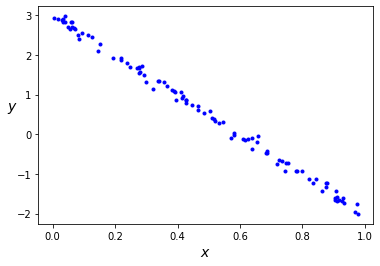

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 100 # Number of samples

x = np.random.rand(N, 1)
y = 3 - 5 * x + 0.1*np.random.randn(N, 1)

plt.plot(x, y, "b.")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.show()

&#x270d; 1) Compute the model parameters usig sklearn.

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)

print('Estimated parameters:\n', lin_reg.intercept_, lin_reg.coef_)

Estimated parameters:
 [3.00521525] [[-5.03397025]]


&#x270d; 2) Compute the model parameters with analytical approach using numpy.

$\theta = (X^\top X)^{-1}X^\top y$

In [ ]:
X = np.hstack((np.ones((N, 1)), x)) 
print('Estimated parameters:\n', np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y)) )

Estimated parameters:
 [[ 3.00521525]
 [-5.03397025]]


In [ ]:
X

In [ ]:
y

&#x270d; 3) Compute the model parameters using tensorflow. 

Hints: For matrix multiplication, matrix transpose and matrix inversion, you can use *tf.matmul()*, *tf.transpose()*, and *tf.matrix_inverse()*, respectively.

In [ ]:
tf.matmul(tf.transpose(X), X)

<tf.Tensor 'MatMul_13:0' shape=(2, 2) dtype=float64>

In [ ]:
X_transpose = tf.transpose(X)

theta_best = tf.matmul(tf.matrix_inverse(tf.matmul(X_transpose, X)), tf.matmul(X_transpose, y))

with tf.Session() as sess:
    theta_best = theta_best.eval()

print('Estimated parameters:\n', theta_best)

Estimated parameters:
 [[ 3.00521525]
 [-5.03397025]]


## Logistic regression with Tensorflow <a id='TF-LogiR'></a>

Consider the following data example:

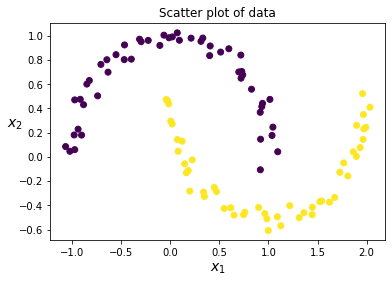

In [ ]:
from sklearn.datasets import make_moons

N = 100
x, y = make_moons(n_samples= N, noise= .05)

plt.scatter(x[:,0], x[:,1], c = y)
plt.xlabel('$x_1$', fontsize = 14)
plt.ylabel('$x_2$', rotation = 0, fontsize = 14)
plt.title('Scatter plot of data');
#print(x)

&#x270d; 4) Classify the data using sklearn.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

model = LogisticRegression(solver='lbfgs').fit(x, y)
y_pred = model.predict(x)

accuracy = accuracy_score(y, y_pred)
print('Accuracy:', accuracy)

print('Estimated parameters:', model.intercept_, model.coef_)

Accuracy: 0.87
Estimated parameters: [0.21344744] [[ 1.06062994 -3.00936947]]


&#x270d; 5) Classify the data using tensorflow.

Hints: 
1. Use *tf.placeholder* and *tf.Variable* for feeding data and trainable parameters, respectively.
2. The backpropagation and optimization can be done automatically by running the session on the "optimizer" object.

X_train shape (100, 3)
Y_train shape (100, 1)
X shape (100, 3)
Y shape (100, 1)
theta shape (3, 1)
Classification accuracy: 0.88


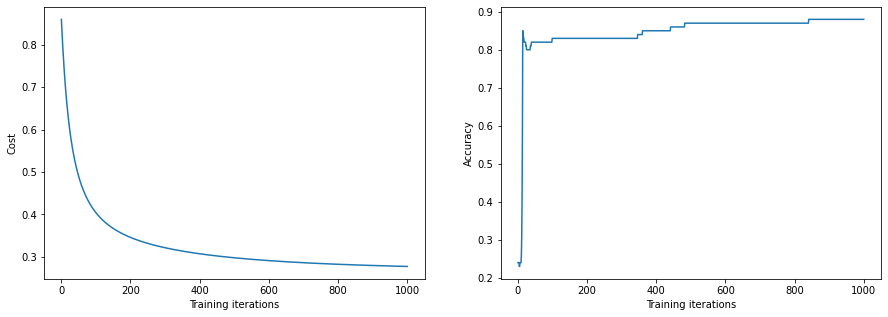

In [ ]:
n_itr = 1000 # number of iterations
eta = 0.1    # learning rate
# ----------------------------------------------------------------
X_train = np.hstack((np.ones((N, 1)), x))
Y_train = y[:, np.newaxis]

print('X_train shape', X_train.shape)
print('Y_train shape', Y_train.shape)
# ----------------------------------------------------------------
X = tf.placeholder('float', [N, X_train.shape[1]])  
Y = tf.placeholder('float', [N, 1]) 

print('X shape', X.get_shape())
print('Y shape', Y.get_shape())
# ----------------------------------------------------------------
# Trainable parameters
theta = tf.Variable(tf.random_normal([X_train.shape[1], 1], mean= 0, stddev= 1))
print('theta shape', theta.get_shape())
# ----------------------------------------------------------------
Y_prob = tf.nn.sigmoid(tf.matmul(X, theta))      

# Sigmoid cross entropy cost function 
cost = -(1/N)*tf.reduce_sum(Y*tf.log(Y_prob)+(1-Y)*tf.log(1-Y_prob))

# Gradient descent optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate = eta).minimize(cost) 
  
# Accuracy
correct_pred = tf.equal(tf.round(Y_prob), Y) 
accuracy = tf.reduce_mean(tf.cast(correct_pred, 'float'))     
     
# Global variables initializer 
init = tf.global_variables_initializer() 
# ----------------------------------------------------------------
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    init.run()  
    
    cost_history, accuracy_history = [], [] 
    for itr in range(n_itr): 
         
        # Running the optimizer 
        sess.run(optimizer, feed_dict={X: X_train, Y: Y_train}) 
                 
        # Calculating cost & accuracy on current epoch 
        c, acc = sess.run([cost, accuracy], feed_dict = {X: X_train, Y: Y_train}) 
  
        # Storing cost & accuracy to the history 
        cost_history.append(c) 
        accuracy_history.append(acc)
# ----------------------------------------------------------------
print('Classification accuracy:', accuracy_history[-1]) 
# ----------------------------------------------------------------
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(np.arange(1, n_itr+1), cost_history) 
plt.xlabel('Training iterations')
plt.ylabel('Cost')

plt.subplot(1,2,2)
plt.plot(np.arange(1, n_itr+1), accuracy_history) 
plt.xlabel('Training iterations')
plt.ylabel('Accuracy');

## Summary <a id='summary'></a>

- We learned how to code in tensorflow by taking the following steps:
    - Building a computation graph containing Tensors and Operations;
    - Creating a session;
    - Initializing the session;
    - Running the session to execute the graph.
- We learned how to use Eager mode for evaluating operations immediately, without building graphs.   
- We explored some differences between tensorflow and numpy.
- We implemented linear regression and logistic regression from scratch in both numpy and tensorflow.